In [101]:
import pandas as pd
import urllib.request


data = pd.read_csv('../../news/scraping_result/en/2018_down1/2018_down1_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/en/2018_down1/2018_down1_Cointelegraph.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2018_down1/2018_down1_Forbes.csv', error_bad_lines=False))


In [102]:
text = data[['main article']]
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [103]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [105]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [109]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [110]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [111]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [114]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [115]:
article_contents = tokenized_doc.values.tolist()

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [117]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [118]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [119]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [120]:
word2id = defaultdict(lambda: 0)

In [121]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [122]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [123]:
len(tf_idf_result)

9974

In [124]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

9974


In [125]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [126]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.000*"countenance" + 0.000*"plaza" + 0.000*"rudy" + 0.000*"sneak" + 0.000*"regnery" + 0.000*"freedomworks" + 0.000*"tamny" + 0.000*"celebs"')
(1, '0.000*"weed" + 0.000*"mueller" + 0.000*"dust" + 0.000*"mateos" + 0.000*"lago" + 0.000*"persist" + 0.000*"larry" + 0.000*"isabelle"')
(2, '0.000*"expectancy" + 0.000*"thermal" + 0.000*"skype" + 0.000*"analogize" + 0.000*"blockchainwhen" + 0.000*"spectrum" + 0.000*"schulman" + 0.000*"tenfold"')
(3, '0.000*"shade" + 0.000*"eminent" + 0.000*"thermostat" + 0.000*"charisma" + 0.000*"attest" + 0.000*"buffet" + 0.000*"jitter" + 0.000*"regularly"')


In [127]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [128]:
sentences = article_contents

In [129]:
from gensim.models import Word2Vec

In [130]:
model = Word2Vec(sentences, min_count=1)

In [131]:
len(model.wv.vocab)

9974

In [132]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [133]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [134]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [135]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [136]:
temp_cluster_result['cluster'] = assigned_clusters

In [137]:
temp_cluster_result['raw_data'] = X.tolist()

In [138]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [139]:
from sklearn.metrics import pairwise_distances

In [140]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [141]:
len(cosine_centroid_list)

9974

In [142]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [143]:
sum(temp_distance[3])

91.62170481273493

In [144]:
import scipy.spatial.distance as dist

In [145]:
dist.cosine(X[0],cosine_centroid_list[0])

0.00011576259720369464

In [146]:
dist.euclidean(X[0],cosine_centroid_list[0])

1.257476607109165

In [147]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [148]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [149]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소, 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3,"[-1.2706769704818726, 1.2221195697784424, -0.4...",bitcoin,0,"[-0.15080139, 0.14489463, -0.058900185, -0.060...",0.000147,0.389313,0.610834,NaN
92,"[-1.2733032703399658, 1.2067346572875977, -0.5...",blockchain,0,"[-0.15080139, 0.14489463, -0.058900185, -0.060...",0.000436,0.242943,0.757492,NaN
6,"[-1.251232385635376, 1.201809048652649, -0.493...",cryptocurrency,0,"[-0.15080139, 0.14489463, -0.058900185, -0.060...",0.000092,0.189483,0.810610,NaN
182,"[-1.273402214050293, 1.2470929622650146, -0.50...",market,0,"[-0.15080139, 0.14489463, -0.058900185, -0.060...",0.000193,0.167926,0.832267,NaN
155,"[-1.3009105920791626, 1.2453559637069702, -0.4...",company,0,"[-0.15080139, 0.14489463, -0.058900185, -0.060...",0.000046,0.167280,0.832767,NaN
333,"[-1.3186277151107788, 1.2743947505950928, -0.5...",make,0,"[-0.15080139, 0.14489463, -0.058900185, -0.060...",0.000055,0.153268,0.846787,NaN
35,"[-1.2788984775543213, 1.2282506227493286, -0.5...",time,0,"[-0.15080139, 0.14489463, -0.058900185, -0.060...",0.000096,0.130849,0.869247,NaN
11,"[-1.3402167558670044, 1.2935553789138794, -0.5...",year,0,"[-0.15080139, 0.14489463, -0.058900185, -0.060...",0.000255,0.129124,0.871131,NaN
169,"[-1.1955095529556274, 1.1426961421966553, -0.4...",exchange,0,"[-0.15080139, 0.14489463, -0.058900185, -0.060...",0.000142,0.128262,0.871880,NaN
965,"[-1.2743085622787476, 1.20632803440094, -0.493...",technology,0,"[-0.15080139, 0.14489463, -0.058900185, -0.060...",0.000277,0.118777,0.881500,NaN


In [150]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 사회적 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2622,"[-0.06295178085565567, 0.05939587950706482, -0...",conjunction,1,"[-0.018675005, 0.01739095, -0.0077941846, -0.0...",0.004492,0.000647,1.003845,NaN
3859,"[-0.0529274083673954, 0.056384023278951645, -0...",dapp,1,"[-0.018675005, 0.01739095, -0.0077941846, -0.0...",0.005581,0.001078,1.004503,NaN
5872,"[-0.05519789457321167, 0.04880469664931297, -0...",onboarding,1,"[-0.018675005, 0.01739095, -0.0077941846, -0.0...",0.005617,0.001078,1.004539,NaN
5984,"[-0.06759590655565262, 0.056695111095905304, -...",accumulate,1,"[-0.018675005, 0.01739095, -0.0077941846, -0.0...",0.005621,0.000862,1.004758,NaN
8007,"[-0.05591876059770584, 0.04907134547829628, -0...",onsite,1,"[-0.018675005, 0.01739095, -0.0077941846, -0.0...",0.005259,0.000431,1.004828,NaN
6573,"[-0.05739530920982361, 0.04923674091696739, -0...",cryptoruble,1,"[-0.018675005, 0.01739095, -0.0077941846, -0.0...",0.005776,0.000862,1.004914,NaN
9758,"[-0.055766742676496506, 0.048008691519498825, ...",servicenow,1,"[-0.018675005, 0.01739095, -0.0077941846, -0.0...",0.006015,0.000431,1.005584,NaN
8793,"[-0.05424328148365021, 0.056086719036102295, -...",taiba,1,"[-0.018675005, 0.01739095, -0.0077941846, -0.0...",0.006131,0.000431,1.005700,NaN
4694,"[-0.054154399782419205, 0.05400119721889496, -...",privilege,1,"[-0.018675005, 0.01739095, -0.0077941846, -0.0...",0.006448,0.000647,1.005801,NaN
3814,"[-0.05228587985038757, 0.05197799205780029, -0...",warehouse,1,"[-0.018675005, 0.01739095, -0.0077941846, -0.0...",0.006689,0.000862,1.005827,NaN


In [160]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2936,"[-0.08276551216840744, 0.0764864981174469, -0....",tetra,2,"[-0.015953116, 0.015753506, -0.0056172633, -0....",0.002572,0.000862,1.001710,NaN
8070,"[-0.06435035914182663, 0.062081433832645416, -...",hang,2,"[-0.015953116, 0.015753506, -0.0056172633, -0....",0.003848,0.000647,1.003201,NaN
2788,"[-0.06151503697037697, 0.05581410601735115, -0...",compatible,2,"[-0.015953116, 0.015753506, -0.0056172633, -0....",0.005391,0.000862,1.004529,NaN
4518,"[-0.04896646738052368, 0.04541328176856041, -0...",igaming,2,"[-0.015953116, 0.015753506, -0.0056172633, -0....",0.007044,0.000862,1.006182,NaN
5115,"[-0.05752117931842804, 0.062075480818748474, -...",nick,2,"[-0.015953116, 0.015753506, -0.0056172633, -0....",0.006723,0.000431,1.006292,NaN
3357,"[-0.046836093068122864, 0.052093781530857086, ...",gdax,2,"[-0.015953116, 0.015753506, -0.0056172633, -0....",0.007820,0.001293,1.006527,NaN
6706,"[-0.053182270377874374, 0.044509243220090866, ...",shrink,2,"[-0.015953116, 0.015753506, -0.0056172633, -0....",0.007367,0.000647,1.006720,NaN
7837,"[-0.05542200803756714, 0.04724615439772606, -0...",descendant,2,"[-0.015953116, 0.015753506, -0.0056172633, -0....",0.007912,0.000647,1.007265,NaN
5769,"[-0.048722367733716965, 0.05242723226547241, -...",orban,2,"[-0.015953116, 0.015753506, -0.0056172633, -0....",0.007885,0.000431,1.007454,NaN
7540,"[-0.048146311193704605, 0.042655814439058304, ...",millennial,2,"[-0.015953116, 0.015753506, -0.0056172633, -0....",0.008386,0.000647,1.007739,NaN


In [152]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
9147,"[0.010478857904672623, -0.011711240746080875, ...",basicsthe,3,"[0.0021167926, -0.002441041, 0.0007718087, 0.0...",0.221539,0.000216,1.221324,NaN
3000,"[0.009624069556593895, -0.007564130239188671, ...",pocs,3,"[0.0021167926, -0.002441041, 0.0007718087, 0.0...",0.268691,0.000216,1.268476,NaN
3198,"[0.0026061951648443937, 0.00041675445390865207...",subrogation,3,"[0.0021167926, -0.002441041, 0.0007718087, 0.0...",0.395814,0.000216,1.395599,NaN
7130,"[-0.0007755705155432224, 0.0006087407236918807...",ideaas,3,"[0.0021167926, -0.002441041, 0.0007718087, 0.0...",0.463963,0.000216,1.463747,NaN
3807,"[0.0046095033176243305, -0.0013848935486748815...",currencya,3,"[0.0021167926, -0.002441041, 0.0007718087, 0.0...",0.466392,0.000216,1.466177,NaN
2728,"[0.004008509684354067, -0.0030185040086507797,...",moot,3,"[0.0021167926, -0.002441041, 0.0007718087, 0.0...",0.470729,0.000216,1.470514,NaN
9129,"[0.0016613497864454985, -0.00799789559096098, ...",optimum,3,"[0.0021167926, -0.002441041, 0.0007718087, 0.0...",0.477286,0.000216,1.477070,NaN
4869,"[0.004022040404379368, -0.0027327286079525948,...",backburner,3,"[0.0021167926, -0.002441041, 0.0007718087, 0.0...",0.477388,0.000216,1.477173,NaN
1832,"[0.0070076435804367065, -0.0019842961337417364...",oligarchical,3,"[0.0021167926, -0.002441041, 0.0007718087, 0.0...",0.486796,0.000216,1.486580,NaN
2571,"[-0.00035429882700555027, -0.00642729550600051...",timeakin,3,"[0.0021167926, -0.002441041, 0.0007718087, 0.0...",0.491956,0.000216,1.491740,NaN


In [153]:
y_km = temp_cluster_result['cluster'].values

In [154]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

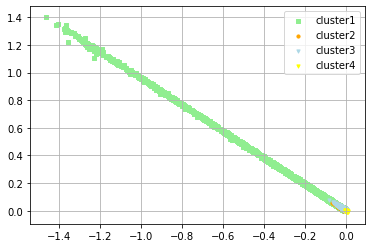

In [155]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [156]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 가격,거래소,암호화폐

7419

In [157]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 사회이슈

1357

In [158]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 인플

1153

In [159]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기타

45

In [161]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 부정적
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 5 #  이슈
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 6  # 인플
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 13 # 기타

In [162]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [163]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [164]:
kmeans.inertia_

612.0786133054735

In [165]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 0 0 ... 1 1 1]


In [166]:
cluster_values= list(model.wv.vocab)

In [167]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-612.0787


In [168]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [169]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7435538


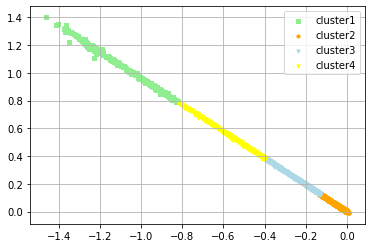

In [171]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [172]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [173]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [174]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [175]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [176]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [177]:
import scipy.spatial.distance as dist

In [178]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [179]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [180]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(30,'score') # 기술한계

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
348,"[-1.0601252317428589, 1.0173404216766357, -0.4...",number,0,"[-1.0668198, 1.023641, -0.4169445, -0.4280566,...",0.050964,0.043976,1.006988,NaN
386,"[-1.070970058441162, 1.0225777626037598, -0.42...",store,0,"[-1.0668198, 1.023641, -0.4169445, -0.4280566,...",0.050975,0.038155,1.012820,NaN
241,"[-1.0712013244628906, 1.0280094146728516, -0.4...",problem,0,"[-1.0668198, 1.023641, -0.4169445, -0.4280566,...",0.051684,0.032335,1.019349,NaN
598,"[-1.074446439743042, 1.0327564477920532, -0.41...",great,0,"[-1.0668198, 1.023641, -0.4169445, -0.4280566,...",0.044759,0.025221,1.019537,NaN
680,"[-1.0673335790634155, 1.0206146240234375, -0.4...",trust,0,"[-1.0668198, 1.023641, -0.4169445, -0.4280566,...",0.047690,0.027808,1.019882,NaN
440,"[-1.0801252126693726, 1.0405515432357788, -0.4...",part,0,"[-1.0668198, 1.023641, -0.4169445, -0.4280566,...",0.064368,0.034059,1.030309,NaN
457,"[-1.0577865839004517, 1.0068457126617432, -0.4...",record,0,"[-1.0668198, 1.023641, -0.4169445, -0.4280566,...",0.074183,0.031688,1.042495,NaN
82,"[-1.0478967428207397, 1.0077781677246094, -0.4...",continue,0,"[-1.0668198, 1.023641, -0.4169445, -0.4280566,...",0.082848,0.032766,1.050081,NaN
644,"[-1.0843061208724976, 1.0451195240020752, -0.4...",plan,0,"[-1.0668198, 1.023641, -0.4169445, -0.4280566,...",0.082649,0.031688,1.050961,NaN
167,"[-1.0469880104064941, 1.016096830368042, -0.41...",order,0,"[-1.0668198, 1.023641, -0.4169445, -0.4280566,...",0.081543,0.029964,1.051580,NaN


In [181]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(40,'score') # 사회이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
9559,"[-0.03297046199440956, 0.038326703011989594, -...",gigantic,1,"[-0.037169963, 0.03575273, -0.0145305935, -0.0...",0.025231,0.000216,1.025016,NaN
7595,"[-0.036383748054504395, 0.039075057953596115, ...",riverside,1,"[-0.037169963, 0.03575273, -0.0145305935, -0.0...",0.025408,0.000216,1.025192,NaN
6052,"[-0.03205609694123268, 0.03399992361664772, -0...",spam,1,"[-0.037169963, 0.03575273, -0.0145305935, -0.0...",0.026016,0.000647,1.025369,NaN
8587,"[-0.03137814998626709, 0.03280283138155937, -0...",bloody,1,"[-0.037169963, 0.03575273, -0.0145305935, -0.0...",0.026024,0.000431,1.025593,NaN
3167,"[-0.03299302980303764, 0.03434336557984352, -0...",yeoh,1,"[-0.037169963, 0.03575273, -0.0145305935, -0.0...",0.026290,0.000431,1.025858,NaN
5194,"[-0.03336195647716522, 0.035917483270168304, -...",occupation,1,"[-0.037169963, 0.03575273, -0.0145305935, -0.0...",0.026779,0.000862,1.025917,NaN
1976,"[-0.04002876579761505, 0.03692074492573738, -0...",contradictory,1,"[-0.037169963, 0.03575273, -0.0145305935, -0.0...",0.026394,0.000431,1.025963,NaN
9676,"[-0.03819067403674126, 0.038893721997737885, -...",disability,1,"[-0.037169963, 0.03575273, -0.0145305935, -0.0...",0.026274,0.000216,1.026059,NaN
4798,"[-0.03265490010380745, 0.03284551203250885, -0...",australia,1,"[-0.037169963, 0.03575273, -0.0145305935, -0.0...",0.026828,0.000647,1.026181,NaN
9542,"[-0.03427935019135475, 0.03648269921541214, -0...",installment,1,"[-0.037169963, 0.03575273, -0.0145305935, -0.0...",0.026629,0.000431,1.026198,NaN


In [182]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4223,"[-0.23123766481876373, 0.2192932516336441, -0....",failure,2,"[-0.22806205, 0.21898946, -0.088968754, -0.090...",0.026572,0.003880,1.022692,NaN
3370,"[-0.22848202288150787, 0.21697598695755005, -0...",robinhood,2,"[-0.22806205, 0.21898946, -0.088968754, -0.090...",0.027465,0.004742,1.022722,NaN
2957,"[-0.22773553431034088, 0.2192867249250412, -0....",vitalik,2,"[-0.22806205, 0.21898946, -0.088968754, -0.090...",0.027524,0.003233,1.024290,NaN
1772,"[-0.23002870380878448, 0.21885915100574493, -0...",signal,2,"[-0.22806205, 0.21898946, -0.088968754, -0.090...",0.028790,0.004096,1.024694,NaN
688,"[-0.22830714285373688, 0.21958501636981964, -0...",popularity,2,"[-0.22806205, 0.21898946, -0.088968754, -0.090...",0.030161,0.004958,1.025203,NaN
3042,"[-0.2321508824825287, 0.21665191650390625, -0....",wonder,2,"[-0.22806205, 0.21898946, -0.088968754, -0.090...",0.028622,0.003233,1.025389,NaN
3953,"[-0.22518256306648254, 0.21830344200134277, -0...",charity,2,"[-0.22806205, 0.21898946, -0.088968754, -0.090...",0.029126,0.003449,1.025677,NaN
2596,"[-0.22937007248401642, 0.2177005261182785, -0....",youtube,2,"[-0.22806205, 0.21898946, -0.088968754, -0.090...",0.029742,0.003665,1.026077,NaN
1583,"[-0.2235511690378189, 0.22035133838653564, -0....",divide,2,"[-0.22806205, 0.21898946, -0.088968754, -0.090...",0.029327,0.003233,1.026094,NaN
2833,"[-0.22876738011837006, 0.21886570751667023, -0...",strength,2,"[-0.22806205, 0.21898946, -0.088968754, -0.090...",0.028959,0.002802,1.026156,NaN


In [183]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
873,"[-0.5658809542655945, 0.5496290326118469, -0.2...",feel,3,"[-0.5680469, 0.54574203, -0.2217359, -0.227104...",0.030668,0.010994,1.019674,NaN
471,"[-0.5732443928718567, 0.5489897727966309, -0.2...",index,3,"[-0.5680469, 0.54574203, -0.2217359, -0.227104...",0.030359,0.010563,1.019796,NaN
2147,"[-0.5676368474960327, 0.5516258478164673, -0.2...",lack,3,"[-0.5680469, 0.54574203, -0.2217359, -0.227104...",0.031535,0.009916,1.021619,NaN
2365,"[-0.5733570456504822, 0.5497381091117859, -0.2...",india,3,"[-0.5680469, 0.54574203, -0.2217359, -0.227104...",0.031999,0.009700,1.022299,NaN
2181,"[-0.568876326084137, 0.5479077100753784, -0.22...",series,3,"[-0.5680469, 0.54574203, -0.2217359, -0.227104...",0.031961,0.009485,1.022476,NaN
1647,"[-0.568810760974884, 0.5378198623657227, -0.21...",method,3,"[-0.5680469, 0.54574203, -0.2217359, -0.227104...",0.036609,0.012503,1.024106,NaN
1768,"[-0.5650358200073242, 0.5488221645355225, -0.2...",broad,3,"[-0.5680469, 0.54574203, -0.2217359, -0.227104...",0.034566,0.009485,1.025081,NaN
673,"[-0.5699453353881836, 0.5538719296455383, -0.2...",request,3,"[-0.5680469, 0.54574203, -0.2217359, -0.227104...",0.033488,0.008192,1.025296,NaN
8015,"[-0.5616898536682129, 0.5500918030738831, -0.2...",copper,3,"[-0.5680469, 0.54574203, -0.2217359, -0.227104...",0.033925,0.007976,1.025949,NaN
551,"[-0.5638459920883179, 0.5336198806762695, -0.2...",option,3,"[-0.5680469, 0.54574203, -0.2217359, -0.227104...",0.039155,0.012718,1.026437,NaN


In [184]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #기술한계

273

In [185]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #사회이슈

7947

In [186]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #인플

1237

In [187]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #기타

517

In [188]:
temp_cluster_result1['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 4 # 기술한계
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 5 # 이슈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 6 # 인플
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 13 # 기타

In [189]:
temp_cluster_result1['result'] = 2 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 2
temp_cluster_result1['Silhouette'] = 0.7435538 
temp_cluster_result['Silhouette'] = 0.7435538
 

In [190]:
temp_cluster_result1.to_csv("../cluster/en_news/2018_down1/en_news_2018_down1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/en_news/2018_down1/en_news_2018_down1_cosine.csv")

In [89]:
word_vectors = model.wv

In [90]:
vocabs = word_vectors.vocab.keys()

In [91]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [92]:
print(word_vectors.similarity(w1='little',w2='push'))

0.9998262


In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [94]:
xys

array([[ 1.27068148e+00,  4.92522211e-04],
       [ 4.58785626e+00, -1.18068744e-02],
       [ 3.46513007e+00, -2.71828208e-04],
       ...,
       [-4.34584305e-01, -2.32313183e-03],
       [-4.77997622e-01,  4.84875290e-03],
       [-4.00230673e-01, -4.55116145e-03]])

In [95]:
xys[:,0]

array([ 1.27068148,  4.58785626,  3.46513007, ..., -0.4345843 ,
       -0.47799762, -0.40023067])

In [96]:
xys[:,1]

array([ 0.00049252, -0.01180687, -0.00027183, ..., -0.00232313,
        0.00484875, -0.00455116])

In [97]:
xs = xys[:,0]
ys = xys[:,1]

In [98]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12304 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12304 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12305 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 11088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27835 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12470 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python

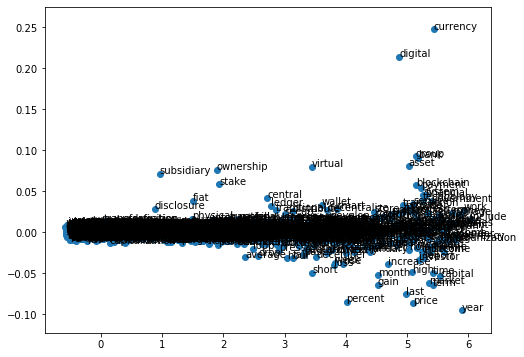

In [99]:
plot_2d_graph(vocabs,xs,ys)

In [100]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>